In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
print('Libraries imported.')

Libraries imported.


In [3]:
!conda install -c conda-forge geocoder --yes
import geocoder

print('Imported geocoder')

Solving environment: done

# All requested packages already installed.

Imported geocoder


In [4]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
print('Imported geopy')

Solving environment: done

# All requested packages already installed.

Imported geopy


In [5]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [6]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
print('Folium installed')

Solving environment: done

# All requested packages already installed.

Folium installed


In [43]:
CLIENT_ID = '5HPJBDZK0VX41O3XZRWPAGWZO01DA4N10GPVHQRH3EX2OEN3' # your Foursquare ID
CLIENT_SECRET = 'H34S0D4WNWV335DT04YALJ4HULHJ3WQ5ZAAWUEEKXPM5K0OU' # your Foursquare Secret

VERSION = '20180604'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5HPJBDZK0VX41O3XZRWPAGWZO01DA4N10GPVHQRH3EX2OEN3
CLIENT_SECRET:H34S0D4WNWV335DT04YALJ4HULHJ3WQ5ZAAWUEEKXPM5K0OU


## This project takes the Corona Virus Data Of The Neighborhoods of New York City from the Githb Repository of nychealth  
Dated: 24-05-2020  
[Corona Virus Data for NYC](https://github.com/nychealth/coronavirus-data/blob/master/data-by-modzcta.csv)

In [7]:
covid_df = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv',index_col=0)
covid_df.to_csv('nyc_corona_data.csv')

#### Lets first visualize our data:

In [8]:
covid_df.shape

(177, 8)

There are 177 rows with 8 columns

In [9]:
covid_df.dtypes

NEIGHBORHOOD_NAME     object
BOROUGH_GROUP         object
COVID_CASE_COUNT       int64
COVID_CASE_RATE      float64
POP_DENOMINATOR      float64
COVID_DEATH_COUNT      int64
COVID_DEATH_RATE     float64
PERCENT_POSITIVE     float64
dtype: object

In [10]:
covid_df.head()

,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE
MODIFIED_ZCTA,,,,,,,,
10001,Chelsea - Clinton,Manhattan,348,1476.89,23563.03,17,72.15,21.64
10002,Union Square - Lower East Side,Manhattan,1002,1305.45,76755.41,143,186.31,30.74
10003,Union Square - Lower East Side,Manhattan,439,815.96,53801.62,30,55.76,18.97
10004,Lower Manhattan,Manhattan,30,821.78,3650.61,1,27.39,19.35
10005,Lower Manhattan,Manhattan,59,702.71,8396.11,2,23.82,15.45


#### As we can see this data has the COVID_CASE_COUNT divided per ZCTA of New York City, but since we require the data per Neighborhood and per borough, lets group it

In [11]:
covid_df.groupby('NEIGHBORHOOD_NAME').sum()

,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE
NEIGHBORHOOD_NAME,,,,,,
Bayside - Little Neck,1278,5868.34,87431.63,84,349.51,115.14
Bedford Stuyvesant - Crown Heights,5690,8513.10,325714.98,614,911.40,157.73
Bensonhurst - Bay Ridge,3180,4607.95,204629.66,340,496.32,91.32
Borough Park,8757,10286.66,337152.76,658,771.38,119.52
Canarsie - Flatlands,5242,8876.29,204565.16,511,1071.22,110.91
Central Harlem - Morningside Height,3090,9131.55,179078.12,298,912.91,140.73
Chelsea - Clinton,2021,7513.98,149437.69,130,405.84,111.43
Coney Island - Sheepshead Bay,6197,8751.82,288893.75,713,1075.39,132.88
Crotona - Tremont,5805,8041.51,215942.35,434,600.74,109.29


We are mainly interested in the Number of Coronavirus cases and deaths per column

In [12]:
covid_per_neigh = covid_df.groupby('NEIGHBORHOOD_NAME').sum()
covid_per_neigh = covid_per_neigh.drop(columns=['COVID_CASE_RATE', 'POP_DENOMINATOR', 'COVID_DEATH_RATE', 'PERCENT_POSITIVE'])

In [13]:
covid_per_neigh.to_csv('nyc_corona_data_perneighborhood.csv')

Now we need to link each Borough Group to its Neighborhood:

In [14]:
covid_df[['BOROUGH_GROUP', 'NEIGHBORHOOD_NAME']].to_csv('nyc_boro_neighborhood.csv')

In [15]:
neighbor_boro = pd.read_csv('nyc_boro_neighborhood.csv')
neighbor_boro.drop(columns=['MODIFIED_ZCTA'], inplace = True)
neighbor_boro.head()

,BOROUGH_GROUP,NEIGHBORHOOD_NAME
0,Manhattan,Chelsea - Clinton
1,Manhattan,Union Square - Lower East Side
2,Manhattan,Union Square - Lower East Side
3,Manhattan,Lower Manhattan
4,Manhattan,Lower Manhattan


#### Now lets combine the two dataframes to one

In [17]:
df_corona1 = pd.merge(neighbor_boro, covid_per_neigh, on="NEIGHBORHOOD_NAME")
df_corona1.drop_duplicates(inplace = True)
df_corona1.reset_index(inplace = True)
df_corona1.drop(columns=['index'], inplace = True)
df_corona1

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT
0,Manhattan,Chelsea - Clinton,2021,130
1,Manhattan,Union Square - Lower East Side,2105,238
2,Manhattan,Lower Manhattan,513,46
3,Manhattan,Gramercy Park - Murray Hill,1369,98
4,Manhattan,Greenwich Village - Soho,693,50
5,Manhattan,Upper East Side,2518,222
6,Manhattan,Upper West Side,2463,266
7,Manhattan,Central Harlem - Morningside Height,3090,298
8,Manhattan,East Harlem,2642,294
9,Manhattan,Washington Heights - Inwood,5693,549


In [20]:
nyc_coord = pd.read_csv('nyc_lat_long.csv')
nyc_coord.head()

,NEIGHBORHOOD_NAME,Latitude,Longitude
0,Bayside - Little Neck,40.758556,-73.765434
1,Bedford Stuyvesant - Crown Heights,41.642210,-73.929550
2,Bensonhurst - Bay Ridge,40.622960,-74.011830
3,Borough Park,40.627330,-73.992960
4,Canarsie - Flatlands,40.642550,-73.902310


In [21]:
df_corona = pd.merge(df_corona1, nyc_coord, on="NEIGHBORHOOD_NAME")
df_corona

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude
0,Manhattan,Chelsea - Clinton,2021,130,40.745278,-74.002222
1,Manhattan,Union Square - Lower East Side,2105,238,40.734200,-73.987500
2,Manhattan,Lower Manhattan,513,46,40.720900,-74.000700
3,Manhattan,Gramercy Park - Murray Hill,1369,98,40.738164,-73.973663
4,Manhattan,Greenwich Village - Soho,693,50,40.735564,-74.002887
5,Manhattan,Upper East Side,2518,222,40.773600,-73.956600
6,Manhattan,Upper West Side,2463,266,40.787000,-73.975400
7,Manhattan,Central Harlem - Morningside Height,3090,298,40.806310,-73.957720
8,Manhattan,East Harlem,2642,294,40.795000,-73.939000
9,Manhattan,Washington Heights - Inwood,5693,549,40.852000,-73.936000


Now let us use our analysis for this data:

In [22]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.1.1


In [23]:
df_corona.describe(include="all")

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude
count,42,42,42.000000,42.000000,42.000000,42.000000
unique,5,42,NaN,NaN,NaN,NaN
top,Brooklyn,Flushing - Clearview,NaN,NaN,NaN,NaN
freq,11,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,4492.738095,387.833333,40.749438,-73.937474
std,NaN,NaN,2878.715339,250.072859,0.162808,0.088385
min,NaN,NaN,513.000000,46.000000,40.582000,-74.138500
25%,NaN,NaN,2476.750000,203.250000,40.657025,-73.991595
50%,NaN,NaN,3757.500000,351.000000,40.734882,-73.940500
75%,NaN,NaN,6096.000000,552.750000,40.793000,-73.895691


Let us find out the top 5 Corona Virus Active Neighborhoods: 

In [25]:
df_corona.sort_values(['COVID_CASE_COUNT'], ascending = False, axis = 0, inplace = True )
df_top5 = df_corona.head()

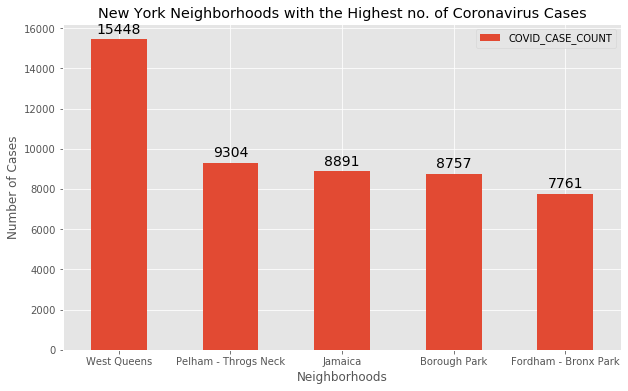

In [26]:
df_tt = df_top5[['NEIGHBORHOOD_NAME','COVID_CASE_COUNT']]

df_tt.set_index('NEIGHBORHOOD_NAME',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Cases') # add to x-label to the plot
ax.set_xlabel('Neighborhoods') # add y-label to the plot
ax.set_title('New York Neighborhoods with the Highest no. of Coronavirus Cases') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

## STAY CLEAR OF THESE PLACES!!

Now let us see so far the safe places:

In [27]:
df_corona.sort_values(['COVID_CASE_COUNT'], ascending = True, axis = 0, inplace = True )
df_last5 = df_corona.head()

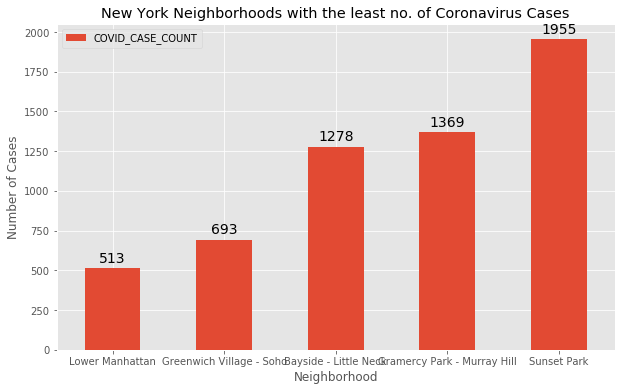

In [28]:
df_bt = df_last5[['NEIGHBORHOOD_NAME','COVID_CASE_COUNT']]

df_bt.set_index('NEIGHBORHOOD_NAME',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Cases') # add to x-label to the plot
ax.set_xlabel('Neighborhood') # add y-label to the plot
ax.set_title('New York Neighborhoods with the least no. of Coronavirus Cases') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

Now let us observe the fatilities caused by this deadly virus:

In [84]:
df_corona.sort_values(['COVID_DEATH_COUNT'], ascending = False, axis = 0, inplace = True )
df_top5 = df_corona.head()

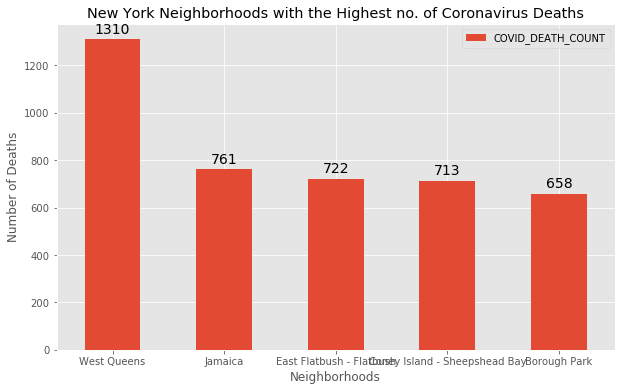

In [85]:
df_tt = df_top5[['NEIGHBORHOOD_NAME','COVID_DEATH_COUNT']]

df_tt.set_index('NEIGHBORHOOD_NAME',inplace = True)

ax = df_tt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Deaths') # add to x-label to the plot
ax.set_xlabel('Neighborhoods') # add y-label to the plot
ax.set_title('New York Neighborhoods with the Highest no. of Coronavirus Deaths') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

In [86]:
df_corona.sort_values(['COVID_DEATH_COUNT'], ascending = True, axis = 0, inplace = True )
df_last5 = df_corona.head()

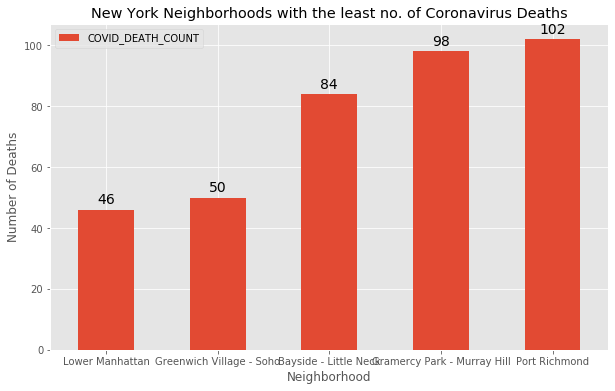

In [87]:
df_bt = df_last5[['NEIGHBORHOOD_NAME','COVID_DEATH_COUNT']]

df_bt.set_index('NEIGHBORHOOD_NAME',inplace = True)

ax = df_bt.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_ylabel('Number of Deaths') # add to x-label to the plot
ax.set_xlabel('Neighborhood') # add y-label to the plot
ax.set_title('New York Neighborhoods with the least no. of Coronavirus Deaths') # add title to the plot

# Creating a function to display the percentage.

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

plt.show()

## As can be seen from the above analysis, the safest place in New York City is **LOWER MANHATTAN**

Let us now get its details:

In [88]:
df_corona.sort_values(['COVID_CASE_COUNT'], ascending = True, axis = 0, inplace = True )
df_last5 = df_corona.head()
df_last5

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude
2,Manhattan,Lower Manhattan,513,46,40.720900,-74.000700
4,Manhattan,Greenwich Village - Soho,693,50,40.735564,-74.002887
35,Queens,Bayside - Little Neck,1278,84,40.758556,-73.765434
3,Manhattan,Gramercy Park - Murray Hill,1369,98,40.738164,-73.973663
31,Brooklyn,Sunset Park,1955,189,40.652700,-74.009300


We also notice that one of the safest Boroughs of New York is Manhattan

In [42]:
# create map of New York using latitude and longitude values
map_lon = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_last5['Latitude'], df_last5['Longitude'], df_last5['BOROUGH_GROUP'], df_last5['NEIGHBORHOOD_NAME']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lon)  
    
map_lon

In [44]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [45]:
venues = getNearbyVenues(names=df_last5['NEIGHBORHOOD_NAME'],
                                   latitudes=df_last5['Latitude'],
                                   longitudes=df_last5['Longitude']
                                  )

Lower Manhattan
Greenwich Village - Soho
Bayside - Little Neck
Gramercy Park - Murray Hill
Sunset Park


In [46]:
print(venues.shape)
venues.head()

(123, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lower Manhattan,40.7209,-74.0007,Dance With Me SoHo,40.722578,-74.001363,Dance Studio
1,Lower Manhattan,40.7209,-74.0007,Le Coucou,40.719114,-74.000202,French Restaurant
2,Lower Manhattan,40.7209,-74.0007,Purl Soho,40.722326,-74.000994,Arts & Crafts Store
3,Lower Manhattan,40.7209,-74.0007,American Two Shot,40.720344,-73.999724,Women's Store
4,Lower Manhattan,40.7209,-74.0007,New York Pilates - Soho,40.719370,-74.000555,Pilates Studio


In [47]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayside - Little Neck,24,24,24,24,24,24
Gramercy Park - Murray Hill,9,9,9,9,9,9
Greenwich Village - Soho,30,30,30,30,30,30
Lower Manhattan,30,30,30,30,30,30
Sunset Park,30,30,30,30,30,30


In [48]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 77 uniques categories.


**Using one hot encoding:**

In [53]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()


,Neighborhood,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Beer Store,Boat or Ferry,...,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Whisky Bar,Wine Bar,Women's Store
0,Lower Manhattan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lower Manhattan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lower Manhattan,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lower Manhattan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Lower Manhattan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [54]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,American Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bank,Beer Store,Boat or Ferry,...,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tea Room,Whisky Bar,Wine Bar,Women's Store
0,Bayside - Little Neck,0.000000,0.000000,0.000000,0.041667,0.041667,0.125000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000
1,Gramercy Park - Murray Hill,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Greenwich Village - Soho,0.066667,0.000000,0.000000,0.000000,0.033333,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000
3,Lower Manhattan,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,...,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333
4,Sunset Park,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.033333,0.033333,0.000000,...,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
grouped.shape

(5, 78)

In [56]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



----Bayside - Little Neck----
                venue  freq
0   Korean Restaurant  0.12
1              Bakery  0.12
2            Pharmacy  0.08
3      Sandwich Place  0.08
4  Chinese Restaurant  0.04


----Gramercy Park - Murray Hill----
                 venue  freq
0  American Restaurant  0.22
1        Boat or Ferry  0.11
2           Playground  0.11
3    Convenience Store  0.11
4          Coffee Shop  0.11


----Greenwich Village - Soho----
                 venue  freq
0            Jazz Club  0.13
1               Bakery  0.10
2  American Restaurant  0.07
3   Italian Restaurant  0.07
4           Steakhouse  0.07


----Lower Manhattan----
                      venue  freq
0  Mediterranean Restaurant  0.13
1             Jewelry Store  0.03
2        Mexican Restaurant  0.03
3    Furniture / Home Store  0.03
4                 Gift Shop  0.03


----Sunset Park----
                 venue  freq
0                 Café  0.10
1          Coffee Shop  0.07
2               Bakery  0.07
3  Japanese R

*Create a data frame of the venues*

In [57]:
#Function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [60]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside - Little Neck,Korean Restaurant,Bakery,Pharmacy,Sandwich Place,Coffee Shop,Greek Restaurant,Fast Food Restaurant,Ice Cream Shop,Pool Hall,Chinese Restaurant
1,Gramercy Park - Murray Hill,American Restaurant,Boat or Ferry,Harbor / Marina,Market,Convenience Store,Coffee Shop,Residential Building (Apartment / Condo),Playground,Beer Store,Bank
2,Greenwich Village - Soho,Jazz Club,Bakery,American Restaurant,Italian Restaurant,Steakhouse,Coffee Shop,Café,Gym,Wine Bar,French Restaurant
3,Lower Manhattan,Mediterranean Restaurant,Women's Store,Furniture / Home Store,Men's Store,Wine Bar,Italian Restaurant,Ice Cream Shop,History Museum,Gift Shop,French Restaurant
4,Sunset Park,Café,Coffee Shop,Bakery,Market,Mexican Restaurant,Food Court,Kofte Place,Deli / Bodega,Kitchen Supply Store,Kebab Restaurant


## Clustering similar neighborhoods together using k - means clustering¶

In [61]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 4, 2, 0], dtype=int32)

In [72]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_).reset_index(drop = True)

merged = df_last5

# merge grouped with data to add latitude/longitude for each neighborhood
merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='NEIGHBORHOOD_NAME')

merged.head() # check the last columns!

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Manhattan,Lower Manhattan,513,46,40.720900,-74.000700,2,Mediterranean Restaurant,Women's Store,Furniture / Home Store,Men's Store,Wine Bar,Italian Restaurant,Ice Cream Shop,History Museum,Gift Shop,French Restaurant
4,Manhattan,Greenwich Village - Soho,693,50,40.735564,-74.002887,4,Jazz Club,Bakery,American Restaurant,Italian Restaurant,Steakhouse,Coffee Shop,Café,Gym,Wine Bar,French Restaurant
35,Queens,Bayside - Little Neck,1278,84,40.758556,-73.765434,3,Korean Restaurant,Bakery,Pharmacy,Sandwich Place,Coffee Shop,Greek Restaurant,Fast Food Restaurant,Ice Cream Shop,Pool Hall,Chinese Restaurant
3,Manhattan,Gramercy Park - Murray Hill,1369,98,40.738164,-73.973663,1,American Restaurant,Boat or Ferry,Harbor / Marina,Market,Convenience Store,Coffee Shop,Residential Building (Apartment / Condo),Playground,Beer Store,Bank
31,Brooklyn,Sunset Park,1955,189,40.652700,-74.009300,0,Café,Coffee Shop,Bakery,Market,Mexican Restaurant,Food Court,Kofte Place,Deli / Bodega,Kitchen Supply Store,Kebab Restaurant


In [73]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2 to 31
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BOROUGH_GROUP           5 non-null      object 
 1   NEIGHBORHOOD_NAME       5 non-null      object 
 2   COVID_CASE_COUNT        5 non-null      int64  
 3   COVID_DEATH_COUNT       5 non-null      int64  
 4   Latitude                5 non-null      float64
 5   Longitude               5 non-null      float64
 6   Cluster Labels          5 non-null      int32  
 7   1st Most Common Venue   5 non-null      object 
 8   2nd Most Common Venue   5 non-null      object 
 9   3rd Most Common Venue   5 non-null      object 
 10  4th Most Common Venue   5 non-null      object 
 11  5th Most Common Venue   5 non-null      object 
 12  6th Most Common Venue   5 non-null      object 
 13  7th Most Common Venue   5 non-null      object 
 14  8th Most Common Venue   5 non-null      objec

In [74]:
# Dropping the row with the NaN value 
merged.dropna(inplace = True)

In [75]:
merged.shape

(5, 17)

In [76]:
merged['Cluster Labels'] = merged['Cluster Labels'].astype(int)

## Visualizing the clusters:

In [77]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['NEIGHBORHOOD_NAME'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

Each cluster is color coded for the ease of presentation


## **Analysis**

Analyse each of the clusters to identify the characteristics of each cluster and the neighborhoods in them.


### Examination of the first cluster:

In [78]:
merged[merged['Cluster Labels'] == 0]

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Brooklyn,Sunset Park,1955,189,40.6527,-74.0093,0,Café,Coffee Shop,Bakery,Market,Mexican Restaurant,Food Court,Kofte Place,Deli / Bodega,Kitchen Supply Store,Kebab Restaurant


### Examination of the second cluster:

In [79]:
merged[merged['Cluster Labels'] == 1]

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Manhattan,Gramercy Park - Murray Hill,1369,98,40.738164,-73.973663,1,American Restaurant,Boat or Ferry,Harbor / Marina,Market,Convenience Store,Coffee Shop,Residential Building (Apartment / Condo),Playground,Beer Store,Bank


### Examination of the third cluster:

In [80]:
merged[merged['Cluster Labels'] == 2]

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Manhattan,Lower Manhattan,513,46,40.7209,-74.0007,2,Mediterranean Restaurant,Women's Store,Furniture / Home Store,Men's Store,Wine Bar,Italian Restaurant,Ice Cream Shop,History Museum,Gift Shop,French Restaurant


We see that this is the safest neighborhood to visit

### Examination of the fourth cluster:

In [81]:
merged[merged['Cluster Labels'] == 3]

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Queens,Bayside - Little Neck,1278,84,40.758556,-73.765434,3,Korean Restaurant,Bakery,Pharmacy,Sandwich Place,Coffee Shop,Greek Restaurant,Fast Food Restaurant,Ice Cream Shop,Pool Hall,Chinese Restaurant


### Examination of the fifth cluster:

In [82]:
merged[merged['Cluster Labels'] == 4]

,BOROUGH_GROUP,NEIGHBORHOOD_NAME,COVID_CASE_COUNT,COVID_DEATH_COUNT,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Manhattan,Greenwich Village - Soho,693,50,40.735564,-74.002887,4,Jazz Club,Bakery,American Restaurant,Italian Restaurant,Steakhouse,Coffee Shop,Café,Gym,Wine Bar,French Restaurant



## Results:

The aim of this project is to help people who want to stay safe from *coronavirus* in New York City, expats can chose the neighborhoods to which they want to relocate based on the most common venues in it. 

## Conclusion:

This project helps a person get a better understanding of the neighborhoods with respect to the most common venues in that neighborhood. It is always helpful to make use of technology to stay one step ahead i.e. finding out more about places before moving into a neighborhood. We have just taken safety as a primary concern to shortlist the neighborhoods of New York City.
